In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from tqdm.auto import tqdm

In [ ]:
!mkdir - p /root/.config/kaggle

In [ ]:
!mv kaggle.json /root/.config/kaggle

In [ ]:
import kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:09<00:00, 174MB/s]
100% 812M/812M [00:09<00:00, 92.8MB/s]


In [ ]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [ ]:
!mkdir images
!mkdir images/dog
!mkdir images/cat

In [ ]:
import shutil

In [ ]:
for i in tqdm(os.listdir("train/")):
  if i.startswith("cat"):
    shutil.copy("train/"+i,"images/cat")
  elif i.startswith("dog"):
    shutil.copy("train/"+i,"images/dog")



  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
!mkdir test

In [ ]:
#!rm -rvf test

removed 'test/dog.3011.jpg'
removed 'test/dog.7849.jpg'
removed 'test/cat.8901.jpg'
removed 'test/dog.7233.jpg'
removed 'test/dog.1172.jpg'
removed 'test/dog.7070.jpg'
removed 'test/cat.415.jpg'
removed 'test/dog.6799.jpg'
removed 'test/cat.3406.jpg'
removed 'test/cat.7806.jpg'
removed 'test/dog.5750.jpg'
removed 'test/cat.43.jpg'
removed 'test/dog.4643.jpg'
removed 'test/dog.8918.jpg'
removed 'test/cat.11652.jpg'
removed 'test/dog.3567.jpg'
removed 'test/dog.2344.jpg'
removed 'test/cat.6243.jpg'
removed 'test/cat.7133.jpg'
removed 'test/dog.7403.jpg'
removed 'test/dog.8156.jpg'
removed 'test/cat.4929.jpg'
removed 'test/cat.5092.jpg'
removed 'test/dog.4018.jpg'
removed 'test/cat.10103.jpg'
removed 'test/dog.3283.jpg'
removed 'test/dog.5167.jpg'
removed 'test/dog.930.jpg'
removed 'test/cat.7990.jpg'
removed 'test/dog.10802.jpg'
removed 'test/cat.3765.jpg'
removed 'test/cat.9355.jpg'
removed 'test/cat.5458.jpg'
removed 'test/dog.11725.jpg'
removed 'test/dog.7260.jpg'
removed 'test/dog.44

In [ ]:
del test_dogg  # does not work
del test_catt  # does not work

In [ ]:
test_dogg=np.random.choice(os.listdir("images/dog"),500,replace=False)
test_catt=np.random.choice(os.listdir("images/cat"),500,replace=False)

for i in test_dogg:
  shutil.move("images/dog/"+i,"test")
for i in test_catt:
  shutil.move("images/cat/"+i,"test")


In [ ]:
len(os.listdir("test")) ## dog run by two times

1000

In [ ]:
idg=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,
                                                    vertical_flip=True,
                                                    height_shift_range=0.25,
                                                    width_shift_range=0.25,rotation_range=30,validation_split=0.1)



In [ ]:
# experiment with single image
dog="train/dog.10.jpg"
img=tf.keras.utils.load_img(dog)
img_arr1=tf.keras.utils.img_to_array(img)
print(img_arr1.shape)
img_arr=img_arr1.reshape((1,)+img_arr1.shape)
print(img_arr.shape)


(292, 269, 3)
(1, 292, 269, 3)


In [ ]:
#experiment
i=0
for j in idg.flow(img_arr,batch_size=1,save_to_dir="aug"):
 i+=1
 if i>9:
   break


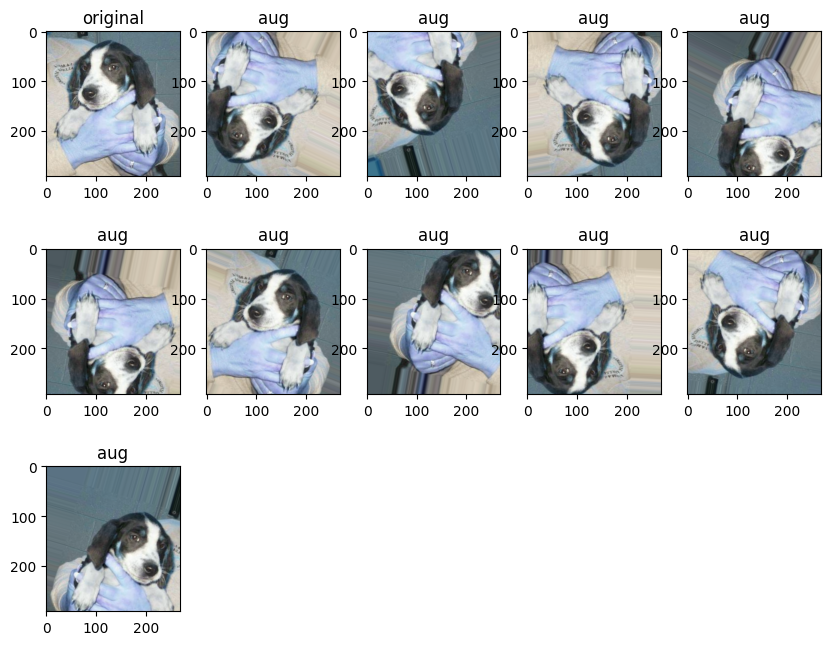

In [ ]:
#experiment
plt.figure(figsize=(10,8))
plt.subplot(3,5,1)
plt.imshow(cv2.imread(dog))
plt.title("original")
for index,i in enumerate(os.listdir("aug")):
  if index>9:
    break
  plt.subplot(3,5,2+index)
  plt.imshow(cv2.imread("aug/"+i))
  plt.title("aug")

In [ ]:
my_img="/content/NEE.jpg"
my_img1=tf.keras.utils.load_img(my_img)
my_img_arr=tf.keras.utils.img_to_array(my_img1)

In [ ]:
my_img_arr.shape

(441, 333, 3)

In [ ]:
my_img_arr1=np.expand_dims(my_img_arr,axis=0)
my_img_arr1.shape

(1, 441, 333, 3)

In [ ]:
i=0
for j in idg.flow(my_img_arr1,batch_size=1,save_to_dir="aug_mine"):
  i+=1
  if i>20:
    break





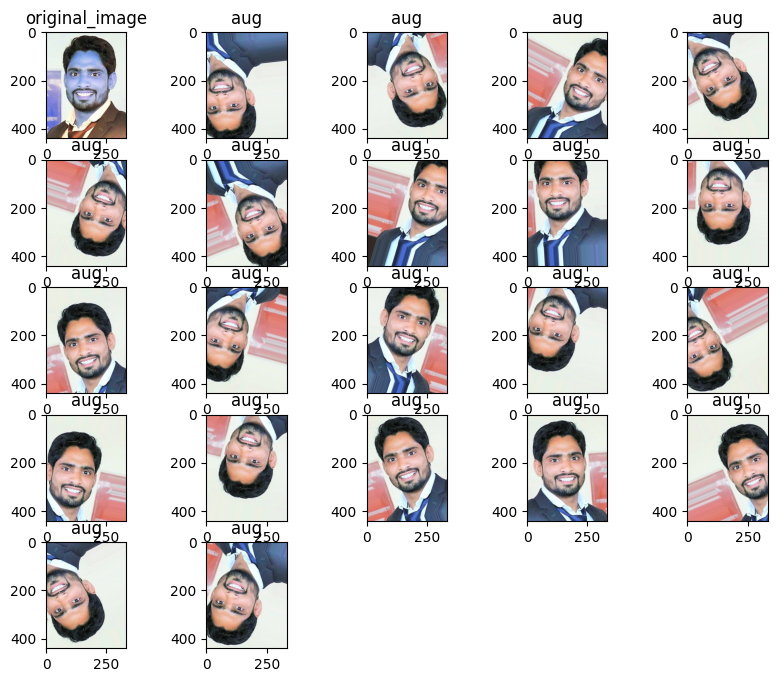

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(5,5,1)
plt.imshow(cv2.imread(my_img))
plt.title("original_image")

for index,i in enumerate(os.listdir("aug_mine")):
  if index>20:
    break
  plt.subplot(5,5,index+2)
  img_m=cv2.imread("aug_mine/"+i)

  plt.imshow(cv2.cvtColor(img_m,cv2.COLOR_BGR2RGB))
  plt.title("aug")

In [ ]:
batch_size=32

In [ ]:
train_idg=idg.flow_from_directory("images",target_size=(150,150),
                                  batch_size=batch_size,
                                  subset="training")


Found 19350 images belonging to 2 classes.


In [ ]:
val_idg=idg.flow_from_directory("images",target_size=(150,150),
                                batch_size=batch_size,
                                subset="validation")

Found 2150 images belonging to 2 classes.


In [ ]:
del model

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((150,150,3),name="Input Layer"))
model.add(tf.keras.layers.Flatten(name="flat"))
model.add(tf.keras.layers.Dense(256,activation="relu",name="HL1"))
model.add(tf.keras.layers.Dense(128,activation="relu",name="HL2"))
model.add(tf.keras.layers.Dense(2,activation="softmax",name="output"))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flat (Flatten)                       │ (None, 67500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL1 (Dense)                          │ (None, 256)                 │      17,280,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL2 (Dense)                          │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,313,410 (66.05 MB)

 Trainable params: 17,313,410 (66.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['acc'])

In [ ]:
#model.fit(train_idg,batch_size=batch_size,validation_data=val_idg,epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


KeyboardInterrupt: 